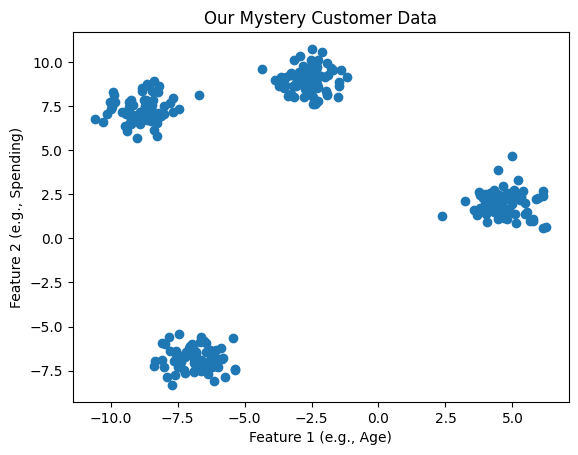

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Our ML tools ---
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs # This is a great tool for creating fake cluster data!

# --- Our Evaluation tool ---
from sklearn.metrics import silhouette_score # From Lesson 7!

# --- Make some fake data ---
# Let's make 300 "customers" with 2 features (e.g., 'Spending', 'Age')
# We'll tell it to make 4 secret groups (centers=4), but we'll pretend we don't know!
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# Plot it to see what we're dealing with
plt.scatter(X[:, 0], X[:, 1])
plt.title("Our Mystery Customer Data")
plt.xlabel("Feature 1 (e.g., Age)")
plt.ylabel("Feature 2 (e.g., Spending)")
plt.show()



...Finding the best 'K' using the Elbow Method...


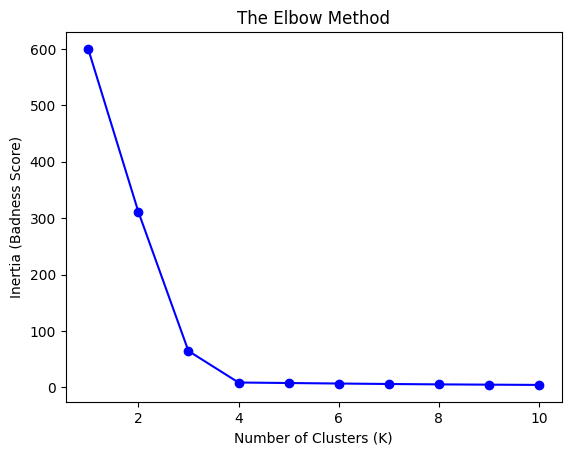

In [2]:

# --- 2. Prepare the Data ---
# K-Means is 100% distance-based. WE MUST SCALE!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. Find the Best 'K' (The Elbow Method) ---
inertia_scores = []
k_values = range(1, 11) # Test K from 1 to 10

print("...Finding the best 'K' using the Elbow Method...")
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_) # 'inertia_' is the final Inertia score

# Plot the Elbow
plt.plot(k_values, inertia_scores, 'bo-') # 'bo-' means blue dots and a line
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Badness Score)')
plt.show()



In [3]:

# --- 4. Create & Train Final Model ---
# Now we know K=4!
k_best = 4
model = KMeans(n_clusters=k_best, n_init=10, random_state=42)

print("\n...Training the final K-Means model with K=4...")
# We use .fit_predict() which both trains and assigns a cluster label
cluster_labels = model.fit_predict(X_scaled)
print("...Model Trained!...")




...Training the final K-Means model with K=4...
...Model Trained!...


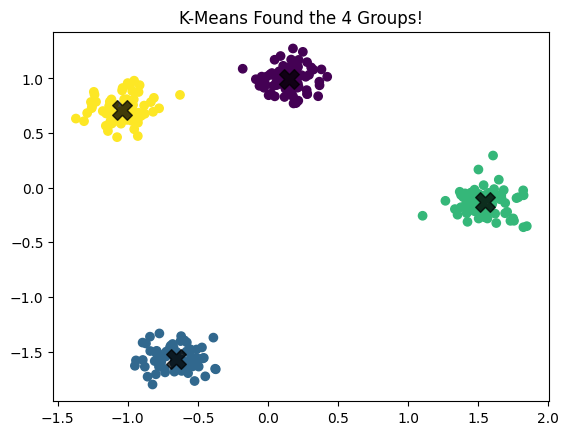


Silhouette Score: 0.86


In [4]:

# --- 5. Visualize the Results! ---
# Let's see the groups our model found
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis') # Color by the new labels!
# Plot the final cluster centers (the "pizza shops") as black X's
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, alpha=0.75)
plt.title("K-Means Found the 4 Groups!")
plt.show()

# --- 6. Evaluate (using Silhouette Score) ---
# We don't have "right answers," but we can check the cluster quality!
score = silhouette_score(X_scaled, cluster_labels)
print(f"\nSilhouette Score: {score:.2f}")

